# 使用OSMNX在区域图形上绘制街道路网

我将使用一个河北的一个城市廊坊，我们设置retain_all =Ture 来保留所有的图形组件，而不仅仅是最大的连接组件。

In [1]:
import matplotlib.pyplot as plt
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import Polygon, MultiPolygon
ox.config(log_console=True, use_cache=True)
ox.__version__

'0.11dev'

In [2]:
# 获取位置区块
gdf = ox.gdf_from_place('Guangyang District,Langfang,Hebei,CN')
gdf = ox.project_gdf(gdf)

# 获取街道路网
G = ox.graph_from_place('Guangyang District',network_type='drive', retain_all=True)
G = ox.project_graph(G)

In [3]:
# 绘制路网但是不展示 或者先关闭
fig, ax = ox.plot_graph(G, fig_height=10, show=False, close=False, edge_color='#777777')
plt.close()

In [4]:
# 在matplotlib坐标轴上，添加笛卡尔坐标下的区块形状
for geometry in gdf['geometry'].tolist():
    if isinstance(geometry, (Polygon, MultiPolygon)):
        if isinstance(geometry, Polygon):
            geometry = MultiPolygon([geometry])
        for polygon in geometry:
            patch = PolygonPatch(polygon, fc='#cccccc', ec='k', linewidth=3, alpha=0.1, zorder=-1)
            ax.add_patch(patch)

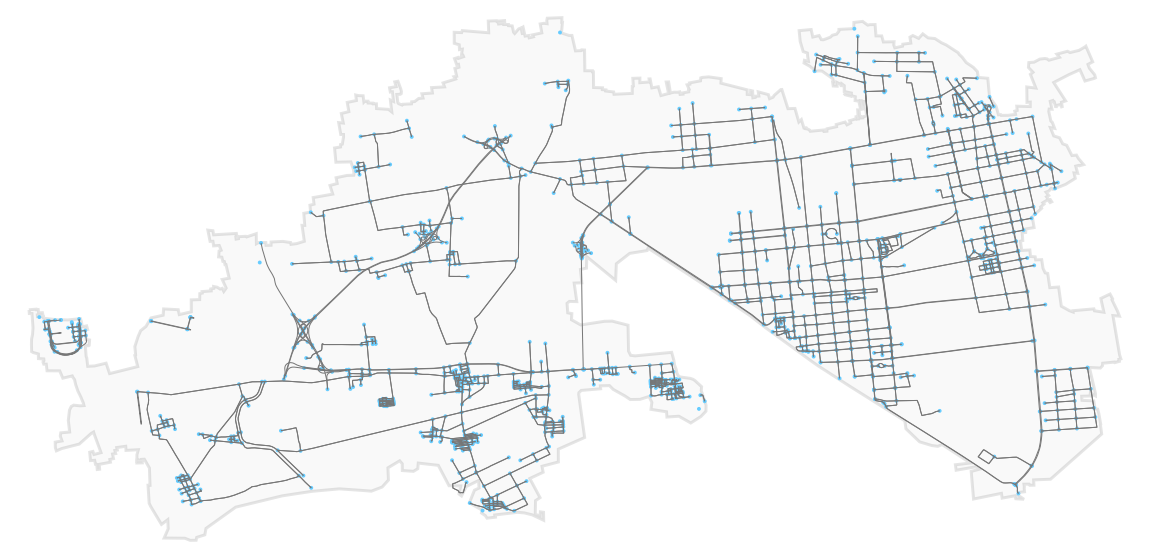

In [5]:
# 可选，可以设置坐标轴范围以更好的展示
margin = 0.02
west, south, east, north = gdf.unary_union.bounds
margin_ns = (north - south) * margin
margin_ew = (east - west) * margin
ax.set_ylim((south - margin_ns, north + margin_ns))
ax.set_xlim((west - margin_ew, east + margin_ew))
fig

请注意，此市政边界是行政边界，而不是物理边界，因此它代表了管辖范围，而不是诸如岛屿之类的个体物理特征。